In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv('KNN - Steady State FE.csv')
df.head()

,time,Ia,Ib,Ic,Vab,Torque,Speed,Category
0,-1.260000e-15,-0.020211,-3.584579,-4.712822,9.865765e-01,-0.049039,-0.022882,OLF
1,3.500000e-01,39.683903,19.006177,24.963238,3.628042e+02,-0.098691,-1.098815,PTGF
2,7.512479e-02,0.000040,0.000028,0.000031,1.360000e-07,2.817946,0.032558,OLF
3,-1.260000e-15,-2.694326,-3.012695,-1.211016,3.346673e+00,-0.065432,-0.012803,NOM
4,3.500000e-01,13.049601,13.049640,13.049629,4.749948e+02,27.789122,146.549910,NOM


In [ ]:
df["Category"] = df["Category"].map({"NOM" :0, "PTGF" :1, "PTPF" :2, "OVF" :3, "UVF" :4, "OLF" :5}).astype(int) #mapping numbers
df.head()

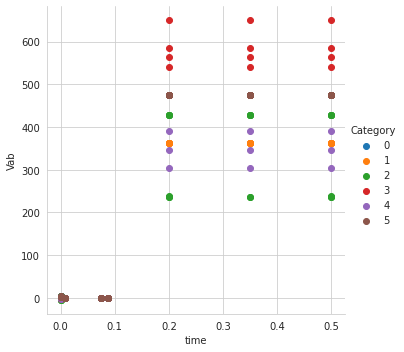

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Category', height=5) \
.map(plt.scatter, "time", "Vab") \
.add_legend();
plt.show()

In [ ]:
x_data = df.drop(['Category', 'time'],axis=1)
y_data = df['Category']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Ia', 'Ib', 'Ic', 'Vab', 'Torque', 'Speed'])


In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(data, y_data)
print(X_sm.shape, y_sm.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  9  0  0  1]
 [ 0  0  0  6  1  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       1.00      0.86      0.92         7
           4       0.95      1.00      0.98        21
           5       0.75      1.00      0.86         3

    accuracy                           0.97        70
   macro avg       0.95      0.96      0.95        70
weighted avg       0.98      0.97      0.97        70

Accuracy: 0.9714285714285714
